In [1]:
from CSVInterface import featRead
import pandas as pd
import seaborn as sns

In [2]:
reader = featRead()

In [3]:
reader.listFrames()

features
album
track
artist
set
echo_audio_feat
echo_meta_data
echo_social_feat
genres


In [4]:
features = reader.getFrame('features')
tracks = reader.getFrame('track')

#append the track column
features['genre'] = tracks['genre_top']
#get the small subset
features = reader.getSubset(features, 'small')

In [5]:
#print out root genres
print(features['genre'].unique())

#set new genres
features['newLabels'] = 'None'
features.loc[features['genre'] == 'Folk', 'newLabels'] = 'GenreA'
features.loc[features['genre'] == 'Instrumental', 'newLabels'] = 'GenreA'

features.loc[features['genre'] == 'Rock', 'newLabels'] = 'GenreB'

features.loc[features['genre'] == 'Pop', 'newLabels'] = 'GenreC'
features.loc[features['genre'] == 'Experimental', 'newLabels'] = 'GenreC'

features.loc[features['genre'] == 'Hip-Hop', 'newLabels'] = 'GenreD'
features.loc[features['genre'] == 'Electronic', 'newLabels'] = 'GenreD'

features.loc[features['genre'] == 'International', 'newLabels'] = 'GenreE'


['Hip-Hop' 'Pop' 'Folk' 'Experimental' 'Rock' 'International' 'Electronic'
 'Instrumental']


In [6]:
chroma = features[['chroma_cens', 'newLabels']]
chromaFeat = chroma.loc[:, ('chroma_cens', 'mean', '01'):('chroma_cens', 'mean', '09')]
chromaFeat['newLabels'] = chroma['newLabels']

## Genre A: Reflective and Complex: Folk and Instrumental

## Genre B: Intense and Rebellious: Rock

## Genre C: Upbeat and Conventional: Pop, Experimental

## Genre D: Energetic adn Rythmic: Hip-Hop, Electronic

## Genre E: Other: International

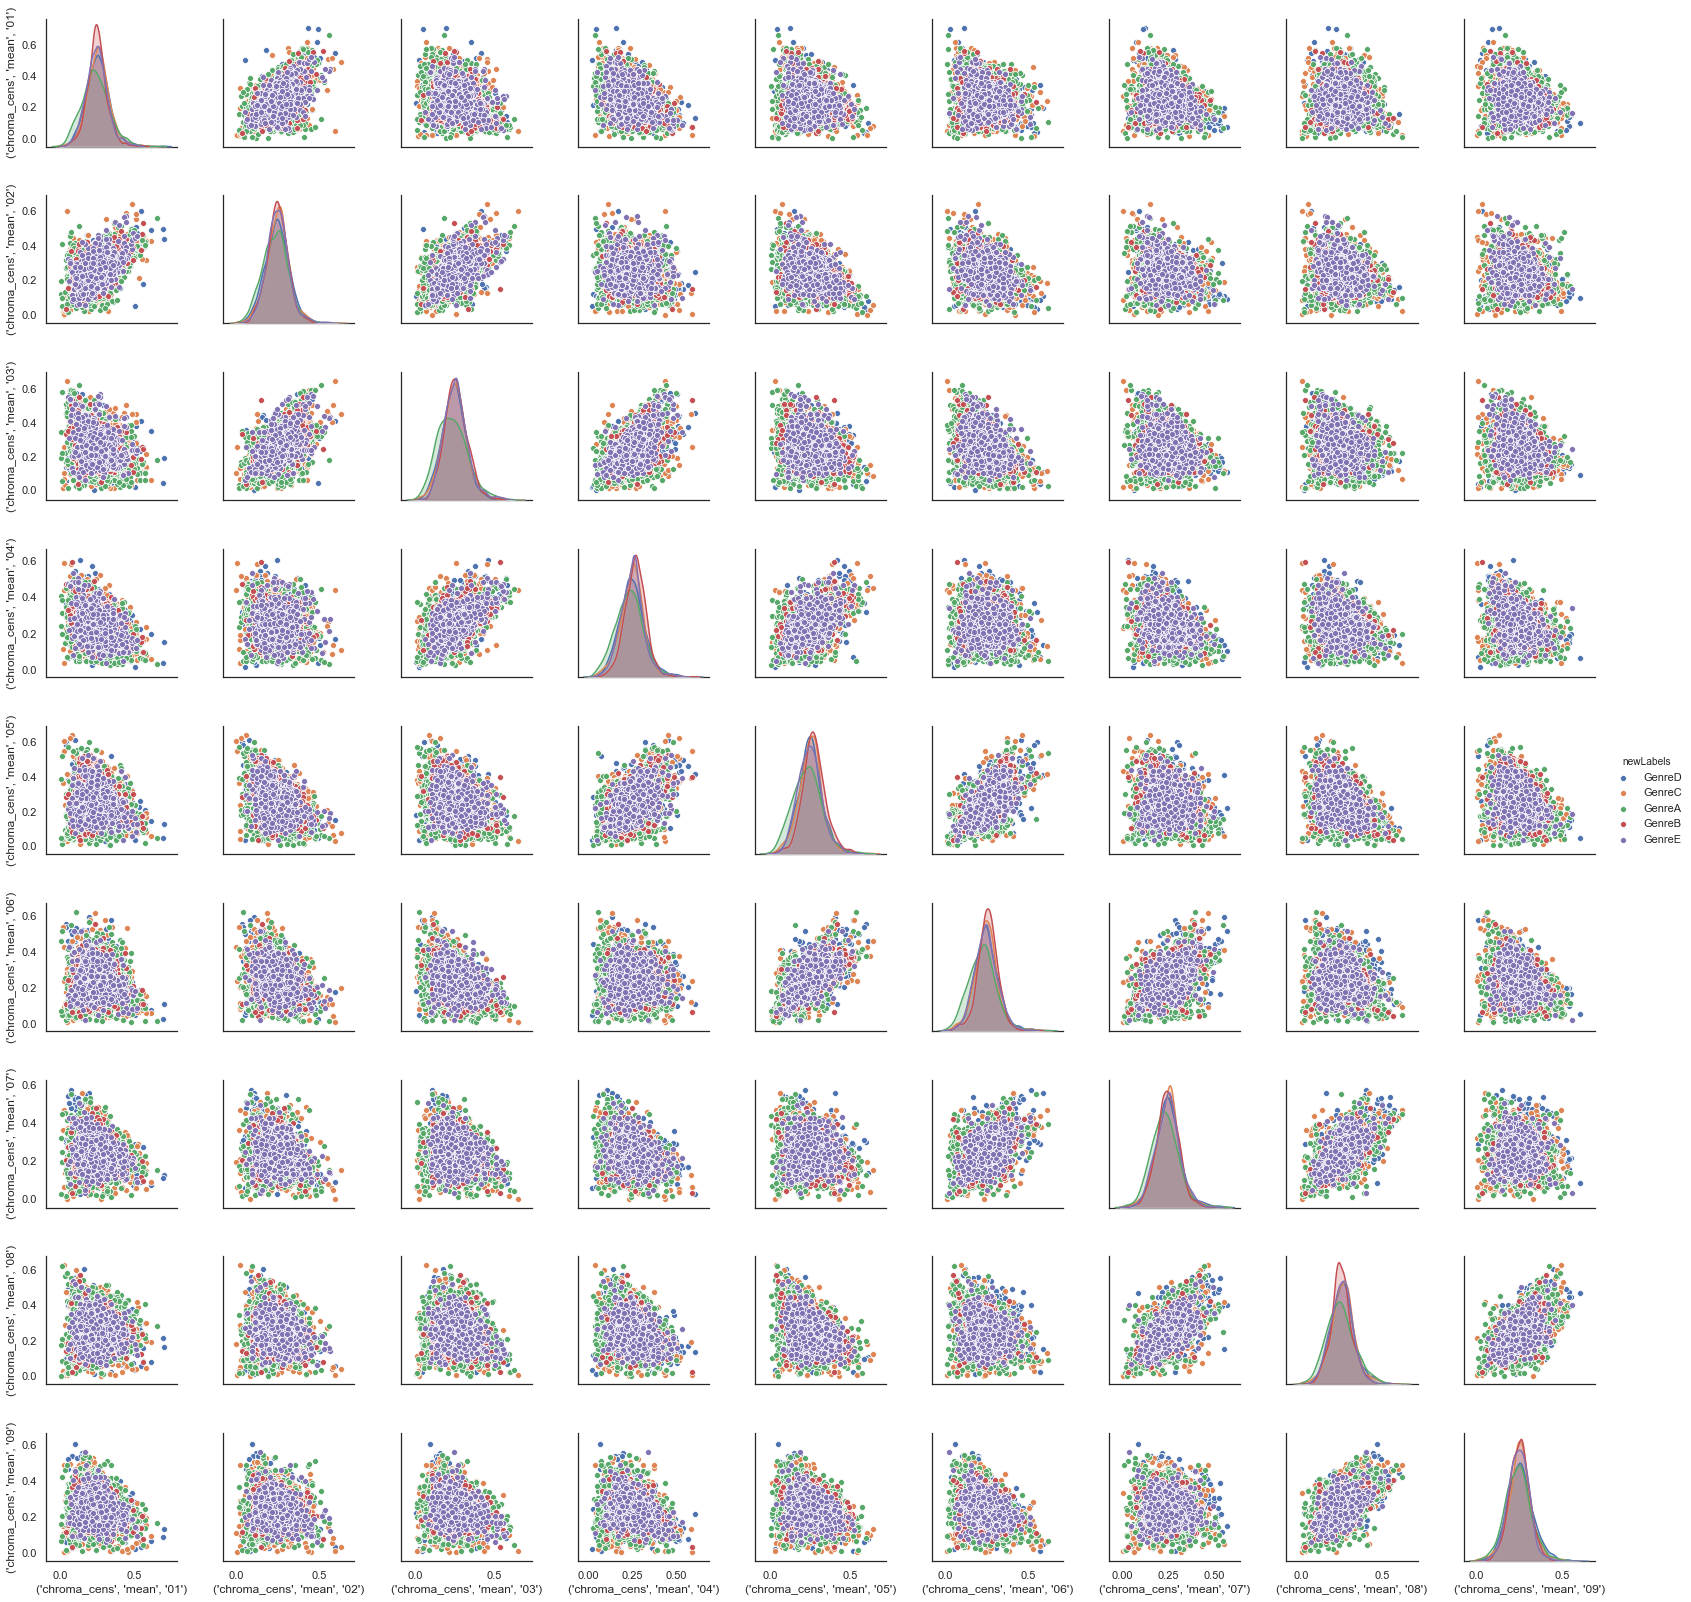

In [7]:
sns.set(style='white', color_codes=True)
sns.pairplot(chromaFeat, hue='newLabels')


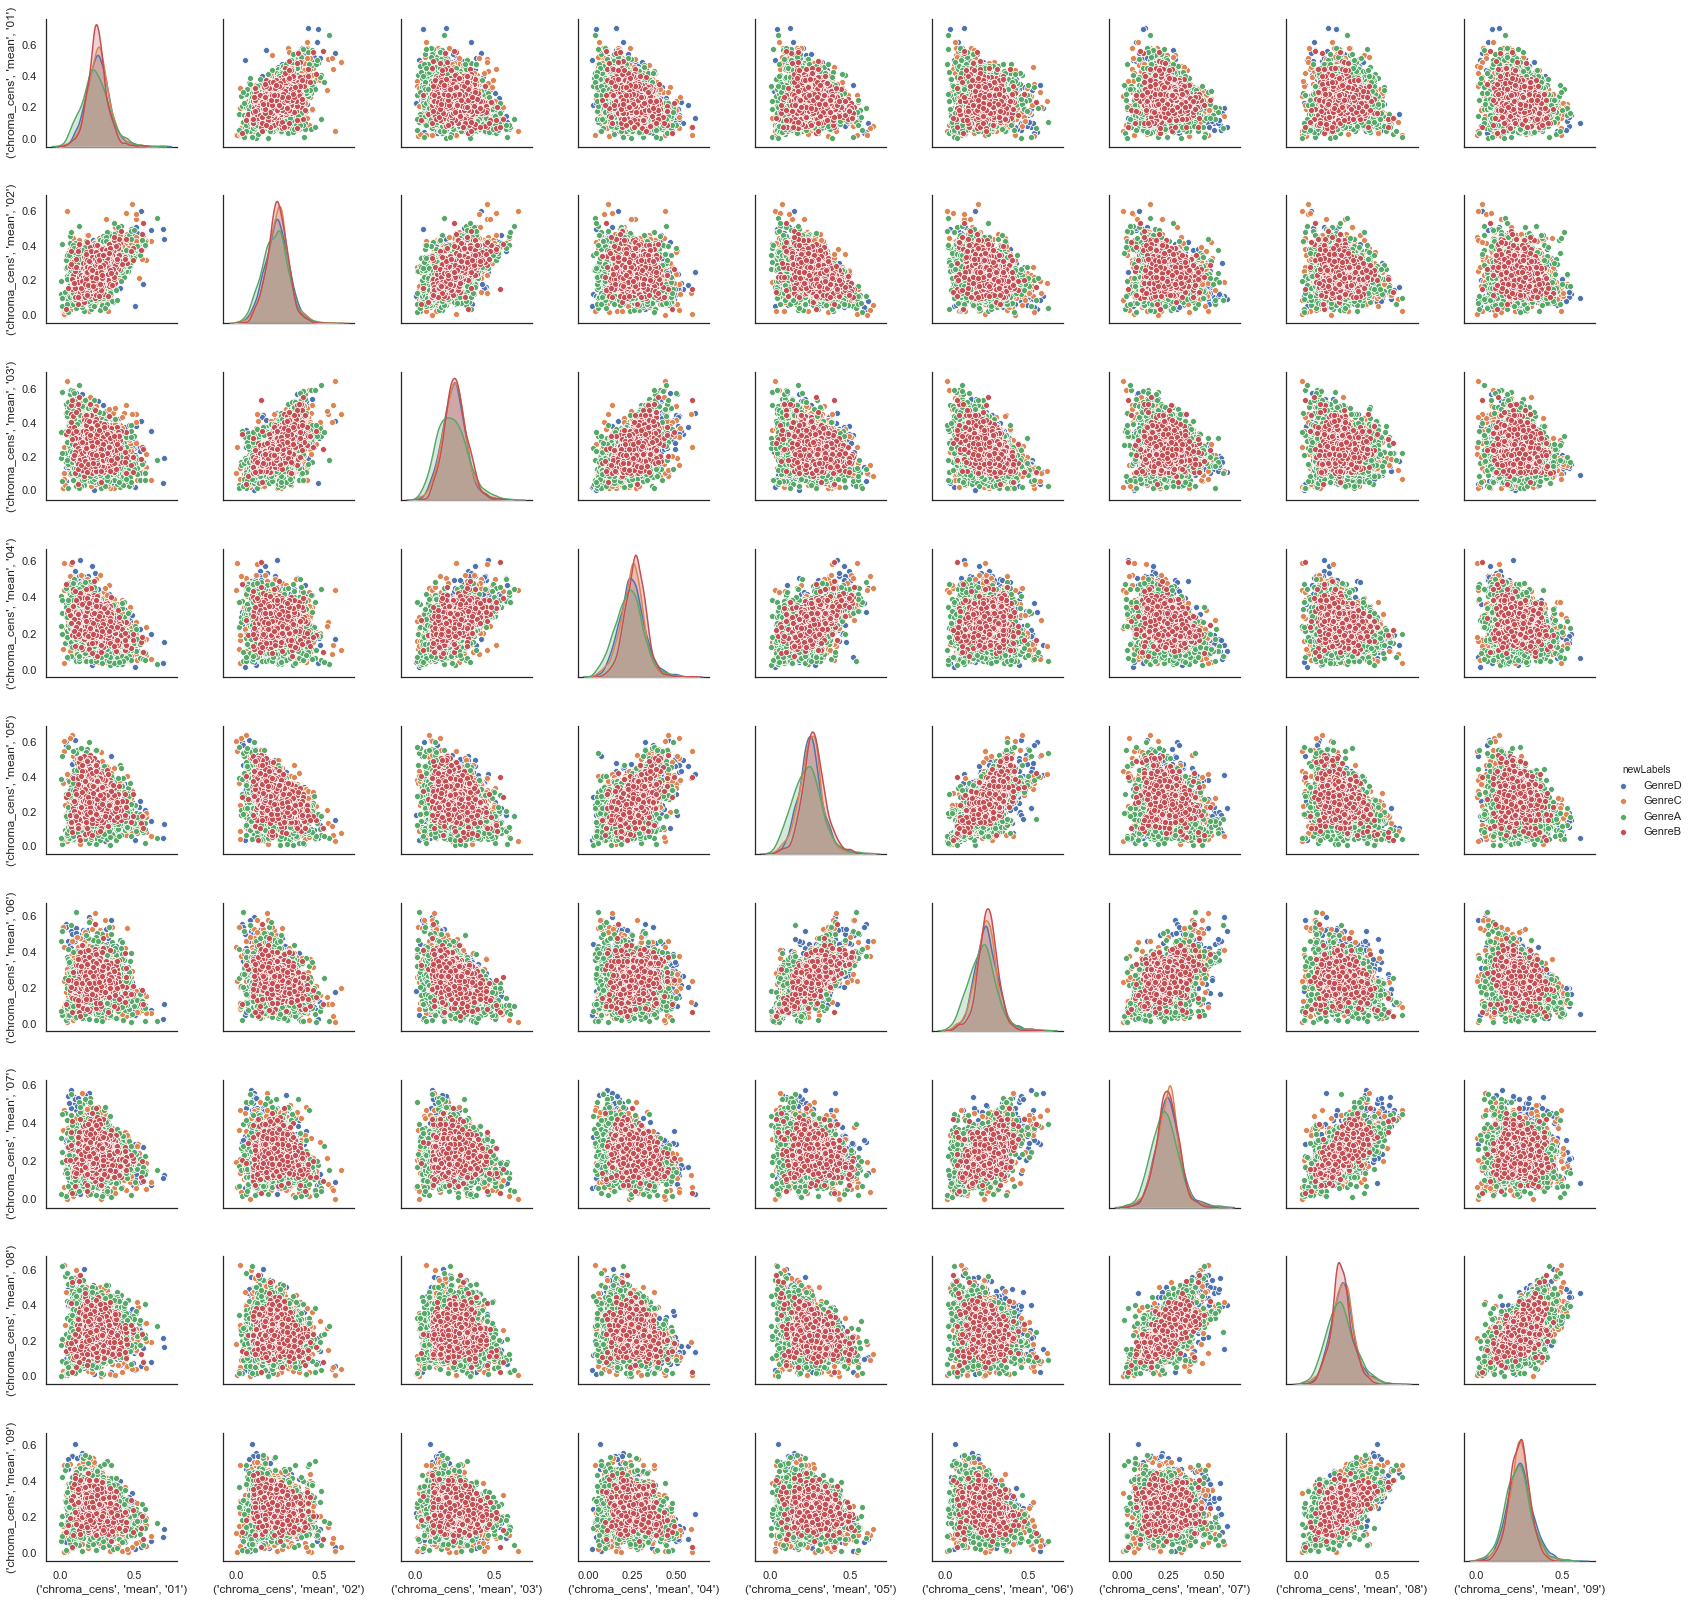

In [11]:
#Drop international(GenreE)
chromaFeat = chromaFeat.loc[chromaFeat['newLabels'] != 'GenreE']
sns.pairplot(chromaFeat, hue='newLabels')

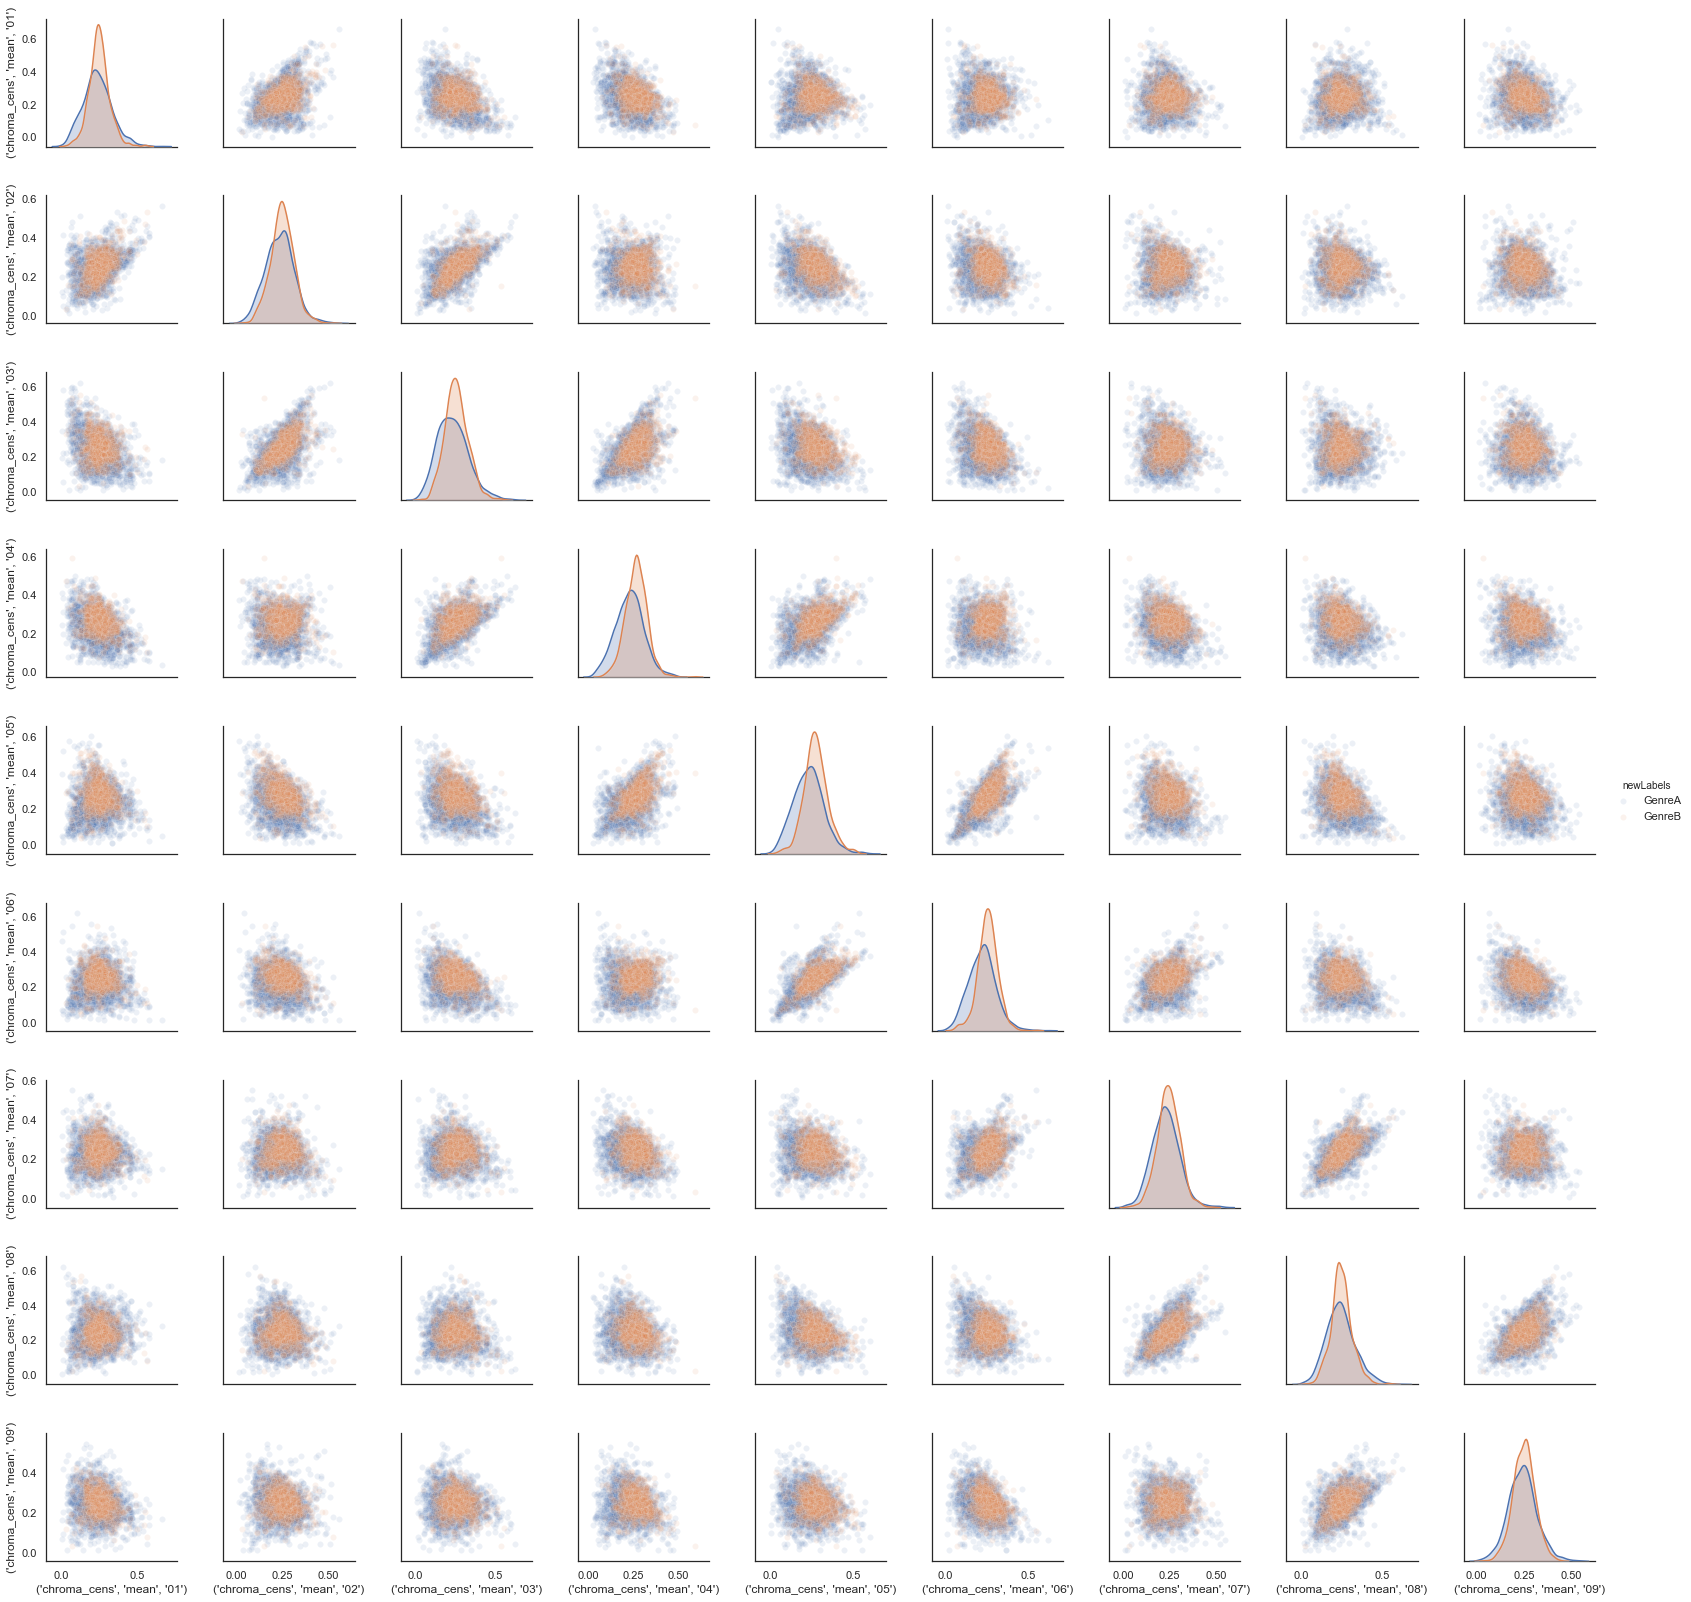

In [15]:
#Only one class
oneClass = chromaFeat.loc[(chromaFeat['newLabels'] == 'GenreA') | (chromaFeat['newLabels'] == 'GenreB')]
sns.pairplot(oneClass, hue='newLabels', plot_kws={'alpha':0.1})